## New York Time fiction bestseller EDA

The following notebooks will explore the NYT fiction bestsellers dataset
to get a good timing of when to release a book

##### Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn-white')

In [11]:
# cleaned book sales dataset
data_path = 'D:\\PycharmProjects\\springboard\\data\\'
nyt = pd.read_csv(f'{data_path}book_nyt_fiction.csv', index_col=[0])

# Convert bestseller_date and published_date to datetime objects
for i in ['bestsellers_date', 'published_date']:
    # Convert to datetime
    nyt[i] = pd.to_datetime(nyt[i])

nyt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10195 entries, 0 to 10194
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   bestsellers_date  10195 non-null  datetime64[ns]
 1   published_date    10195 non-null  datetime64[ns]
 2   author            10195 non-null  object        
 3   description       9949 non-null   object        
 4   price             7162 non-null   float64       
 5   publisher         10195 non-null  object        
 6   title             10195 non-null  object        
 7   rank              10195 non-null  int64         
 8   rank_last_week    10195 non-null  int64         
 9   weeks_on_list     10195 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 876.1+ KB


Since published date marks the day the NYT list is posted, it will be behind
the bestsellers_date by 15 days which is when the rank is based on.

We will use bestsellers_date here.

There are 529 weeks, 2300 titles and 738 different authors.

# Rank last week changes

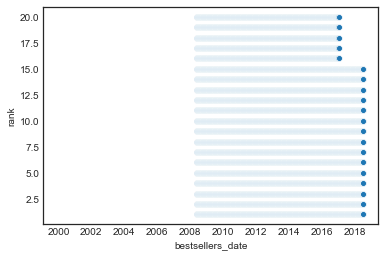

In [21]:
sns.scatterplot(y='rank', x='bestsellers_date', data=nyt)

In [22]:
nyt.groupby('bestsellers_date').count()

,published_date,author,description,price,publisher,title,rank,rank_last_week,weeks_on_list
bestsellers_date,,,,,,,,,
2008-05-24,20,20,18,8,20,20,20,20,20
2008-05-31,20,20,18,7,20,20,20,20,20
2008-06-07,20,20,17,7,20,20,20,20,20
2008-06-14,20,20,20,7,20,20,20,20,20
2008-06-21,20,20,20,8,20,20,20,20,20
...,...,...,...,...,...,...,...,...,...
2018-06-09,15,15,15,15,15,15,15,15,15
2018-06-16,15,15,15,15,15,15,15,15,15
2018-06-23,15,15,15,15,15,15,15,15,15


# Weeks on list

In [24]:
nyt.head()

,bestsellers_date,published_date,author,description,price,publisher,title,rank,rank_last_week,weeks_on_list
0,2008-05-24,2008-06-08,Dean R Koontz,"Odd Thomas, who can communicate with the dead,...",27.0,Bantam,ODD HOURS,1,0,1
1,2008-05-24,2008-06-08,Stephenie Meyer,Aliens have taken control of the minds and bod...,NaN,"Little, Brown",THE HOST,2,1,3
2,2008-05-24,2008-06-08,Emily Giffin,A woman's happy marriage is shaken when she en...,NaN,St. Martin's,LOVE THE ONE YOU'RE WITH,3,2,2
3,2008-05-24,2008-06-08,Patricia Cornwell,A Massachusetts state investigator and his tea...,NaN,Putnam,THE FRONT,4,0,1
4,2008-05-24,2008-06-08,Chuck Palahniuk,An aging porn queens aims to cap her career by...,NaN,Doubleday,SNUFF,5,0,1


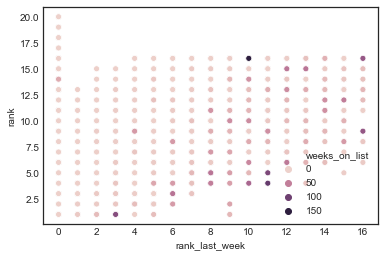

In [28]:
sns.scatterplot(x='rank_last_week', y='rank', data=nyt, hue='weeks_on_list')

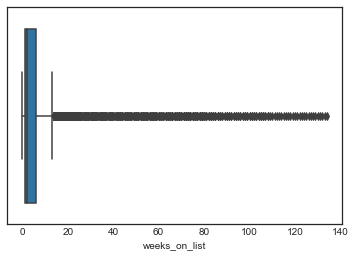

In [34]:
sns.boxplot(nyt.weeks_on_list)


In [116]:
df = nyt.sort_values(by='weeks_on_list',ascending=False).groupby('title').head(1)
df[['author','title','weeks_on_list']].head(20)


,author,title,weeks_on_list
8995,Anthony Doerr,ALL THE LIGHT WE CANNOT SEE,134
3452,Kathryn Stockett,THE HELP,108
5515,George R R Martin,A DANCE WITH DRAGONS,86
8795,Kristin Hannah,THE NIGHTINGALE,82
6168,Gillian Flynn,GONE GIRL,80
8512,Paula Hawkins,THE GIRL ON THE TRAIN,79
3910,Stieg Larsson,THE GIRL WHO KICKED THE HORNET’S NEST,79
6954,Donna Tartt,THE GOLDFINCH,60
1251,Stephenie Meyer,THE HOST,59
10042,Amor Towles,A GENTLEMAN IN MOSCOW,58


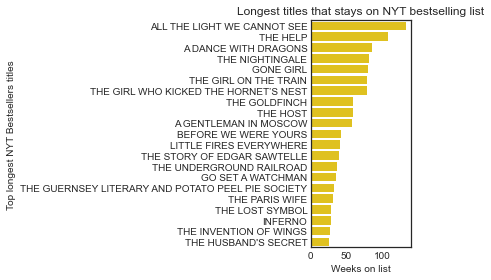

In [120]:
# plot best books
sns.barplot(y='title', x='weeks_on_list', data=df.iloc[:21,:], color='gold')
plt.xlabel('Weeks on list')
plt.ylabel('Top longest NYT Bestsellers titles')
plt.title('Longest titles that stays on NYT bestselling list')
plt.tight_layout()
plt.savefig('images/top_title_nyt')

In [ ]:
#
nyt.groupby(['title'])['rank'].count().sort_values(ascending=False)

In [64]:
nyt.author.value_counts()

John Grisham                          226
David Baldacci                        222
Danielle Steel                        174
Stephen King                          157
Anthony Doerr                         141
                                     ... 
Terry Pratchett and Stephen Baxter      1
Rick Springfield                        1
Anne Fortier                            1
Meg Cabot                               1
Ivan Doig                               1
Name: author, Length: 738, dtype: int64